In [1]:
from knapsax.utils import setrootdir

setrootdir("knapsax")

'Directory knapsax successfully loaded as current working directory.'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from knapsax.optimization import Problem, Maximize, Solution, Knapsack
from knapsax.aco import ACO
from knapsax.stats import Stats

In [3]:
knapsack = Knapsack(instance_file="data/knapsack-instance.txt")
knapsack

Knapsack(file=data/knapsack-instance.txt, n_items=100, capacity=1550)

In [4]:
aco = ACO(
    knapsack,
    n_ants=50, n_best=10, n_iterations=50,
    decay=0.95, alpha=1, beta=2
)

In [ ]:
class ACOSolution(Solution):
    def __init__(self, knapsack, pheromone_vector, alpha=1, beta=1):
        super().__init__(knapsack)
        self.pheromone_vector = pheromone_vector
        self.alpha = alpha
        self.beta = beta

    def generate_solution(self):
        available_items = set(range(self.knapsack.n_items))

        while available_items:
            probabilities = self.compute_probabilities(available_items)

            if probabilities.sum() == 0 or len(available_items) == 0:
                break

            item_index = np.random.choice(list(available_items), p=probabilities)

            self.add_item(item_index)
            available_items.remove(item_index)

    def compute_probabilities(self, available_items):
        pheromone = np.array([self.pheromone_vector[i] for i in available_items])
        heuristic = np.array([self.knapsack.items[i].value / self.knapsack.items[i].weight for i in available_items])
        scores = (pheromone ** self.alpha) * (heuristic ** self.beta)
        total = scores.sum()
        if total == 0:
            return np.ones_like(scores) / len(scores)
        return scores / total

In [5]:
aco_stats = Stats(
    n_runs=10,
    algorithm_instance=aco
)

aco_stats.run()

Running <class 'knapsax.aco.ACO'>: 100%|██████████| 10/10 [02:30<00:00, 15.06s/run]


In [6]:
aco_stats.data["best_value"]

[2186, 2184, 2183, 2179, 2183, 2188, 2180, 2180, 2181, 2182]

In [7]:
df_aco = aco_stats.frame()
df_aco

,iteration,best_solution,best_value,best_weight,history_value,history_weight,execution_time,memory_peak,memory_peak_mb
0,0,"[66, 83, 31, 5, 78, 18, 26, 13, 27, 16, 38, 74...",2186,1549,"[2061, 2131, 2131, 2131, 2152, 2152, 2158, 215...","[1545, 1550, 1550, 1550, 1549, 1549, 1549, 154...",16.649700,218221,0.218221
1,1,"[74, 37, 40, 92, 20, 42, 8, 5, 44, 31, 47, 81,...",2184,1549,"[2073, 2103, 2135, 2137, 2145, 2145, 2155, 215...","[1542, 1548, 1543, 1549, 1543, 1543, 1549, 154...",14.935241,205726,0.205726
2,2,"[2, 38, 18, 78, 85, 47, 42, 26, 55, 3, 5, 44, ...",2183,1546,"[2077, 2099, 2111, 2130, 2140, 2146, 2146, 214...","[1542, 1548, 1547, 1547, 1550, 1546, 1546, 154...",14.931164,204549,0.204549
3,3,"[5, 55, 81, 20, 78, 71, 83, 16, 53, 62, 76, 37...",2179,1550,"[2058, 2105, 2109, 2129, 2143, 2143, 2157, 215...","[1542, 1545, 1547, 1543, 1550, 1550, 1546, 154...",14.849391,204290,0.204290
4,4,"[66, 68, 99, 85, 44, 41, 89, 8, 22, 76, 35, 58...",2183,1549,"[2063, 2128, 2128, 2133, 2137, 2137, 2160, 216...","[1546, 1550, 1550, 1544, 1549, 1549, 1549, 154...",14.879402,204719,0.204719
5,5,"[70, 72, 16, 12, 87, 49, 26, 35, 55, 42, 24, 9...",2188,1550,"[2071, 2117, 2153, 2153, 2153, 2153, 2153, 216...","[1550, 1548, 1549, 1549, 1549, 1549, 1549, 153...",14.777070,204888,0.204888
6,6,"[49, 45, 89, 8, 35, 90, 38, 14, 55, 93, 78, 53...",2180,1550,"[2073, 2106, 2115, 2120, 2135, 2135, 2135, 215...","[1543, 1545, 1549, 1541, 1545, 1545, 1545, 154...",14.872065,203848,0.203848
7,7,"[68, 40, 81, 90, 33, 99, 8, 32, 95, 60, 44, 55...",2180,1550,"[2054, 2099, 2109, 2114, 2143, 2146, 2146, 214...","[1547, 1545, 1548, 1547, 1544, 1550, 1550, 155...",14.842642,205013,0.205013
8,8,"[74, 16, 55, 24, 21, 99, 32, 38, 87, 42, 90, 2...",2181,1550,"[2045, 2098, 2113, 2122, 2157, 2157, 2157, 215...","[1549, 1549, 1550, 1548, 1550, 1550, 1550, 155...",14.927584,203963,0.203963
9,9,"[26, 22, 71, 49, 24, 56, 40, 60, 8, 31, 99, 53...",2182,1549,"[2053, 2105, 2125, 2125, 2140, 2153, 2153, 215...","[1549, 1550, 1549, 1549, 1544, 1550, 1550, 155...",14.890929,204348,0.204348


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Convergência do ACO para o problema da mochila'}, xlabel='Iteração', ylabel='Valor'>)

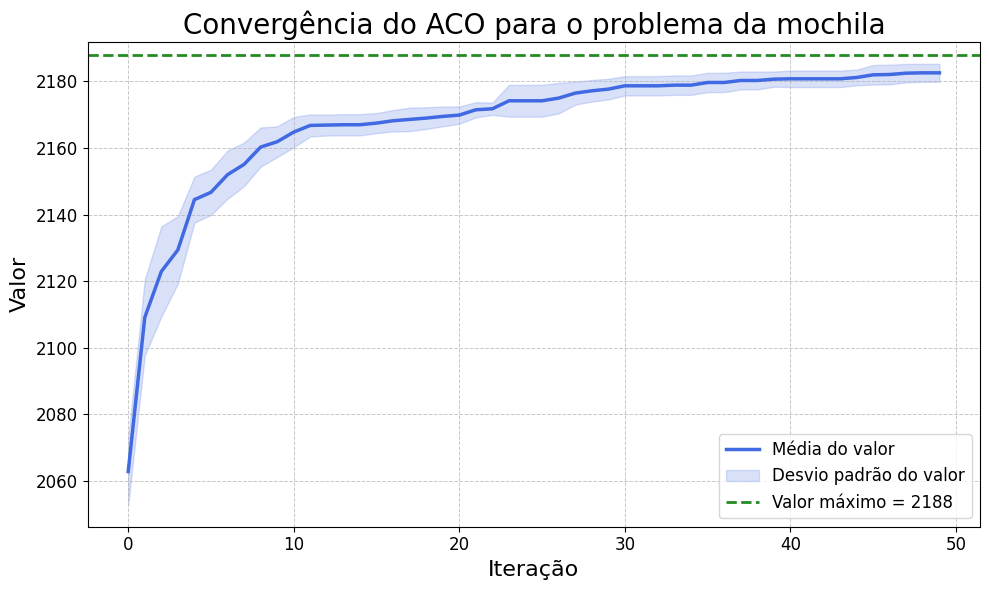

In [8]:
aco_stats.plot_convergence(
    title="Convergência do ACO para o problema da mochila",
    savefig="results/aco_convergence.png"
)